In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Gaussian mixture models(GMM) makes two important assumptions:here are exactly  𝑘  clusters in the data and these 𝑘 distributions are Gaussians (which is normal distribution)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics


In [3]:
# Loading the data from scikit-learn's datasets module and standardize variables before fitting GMM
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

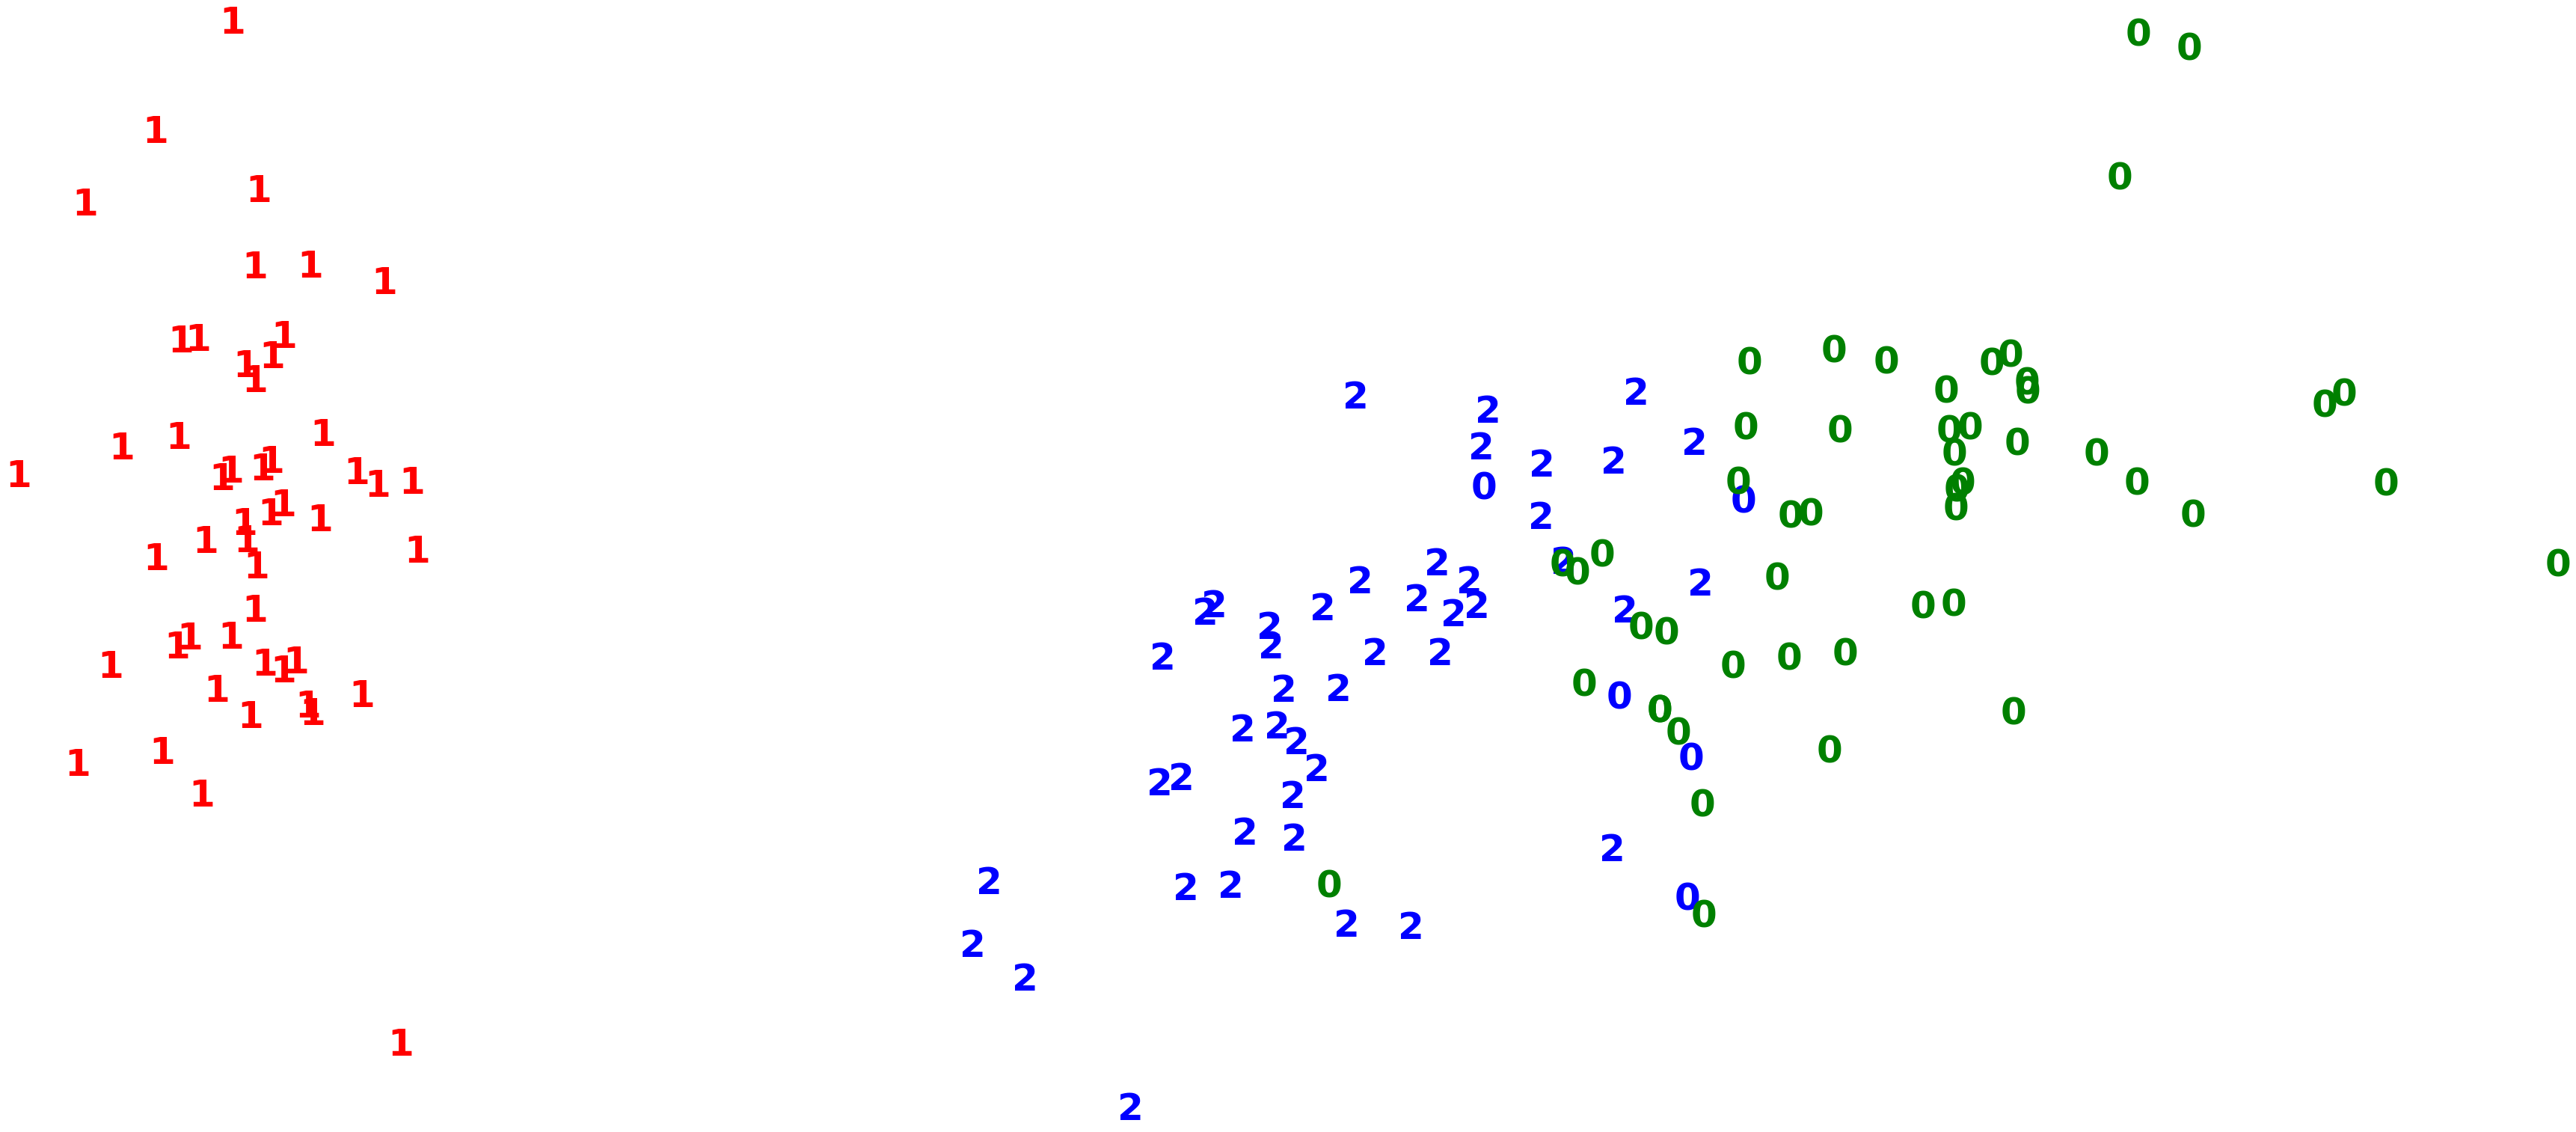

In [4]:
#Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)
#visualize the results by applying PCA using the first two components
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#GMM solution even separated the two linearly nonseparable classes!

In [5]:
#Get the ARI and silhouette scores of this solution:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
#According to the #ARI, the GMM solution is very close to 1, which indicates that it did a fairly good job! 
#But the scikit-learn implementation of the GaussianMixture uses k-means in the initialization of the means of the Gaussians.

Adjusted Rand Index of the GMM solution: 0.9038742317748124
The silhouette score of the GMM solution: 0.37416491866541235


In [6]:
# Relabeling
clusters = np.array([2 if x == 1 else 1 if x==2 else x for x in clusters])

pd.crosstab(y,clusters)

#Only five observations seem to be assigned to the wrong cluster even though silhouette score is only 0.37
#This is due to the fact that the two classes among the three classes are not linearly separable, and they are very close to each other in the high-dimensional space. 
#The more that an algorithm distinguishes these two classes, the lower its silhouette score is. Hence, measuring the performances of the clustering algorithms on the Iris dataset using the silhouette score is misleading.

col_0,0,1,2
row_0,,,
0,0,0,50
1,5,45,0
2,50,0,0


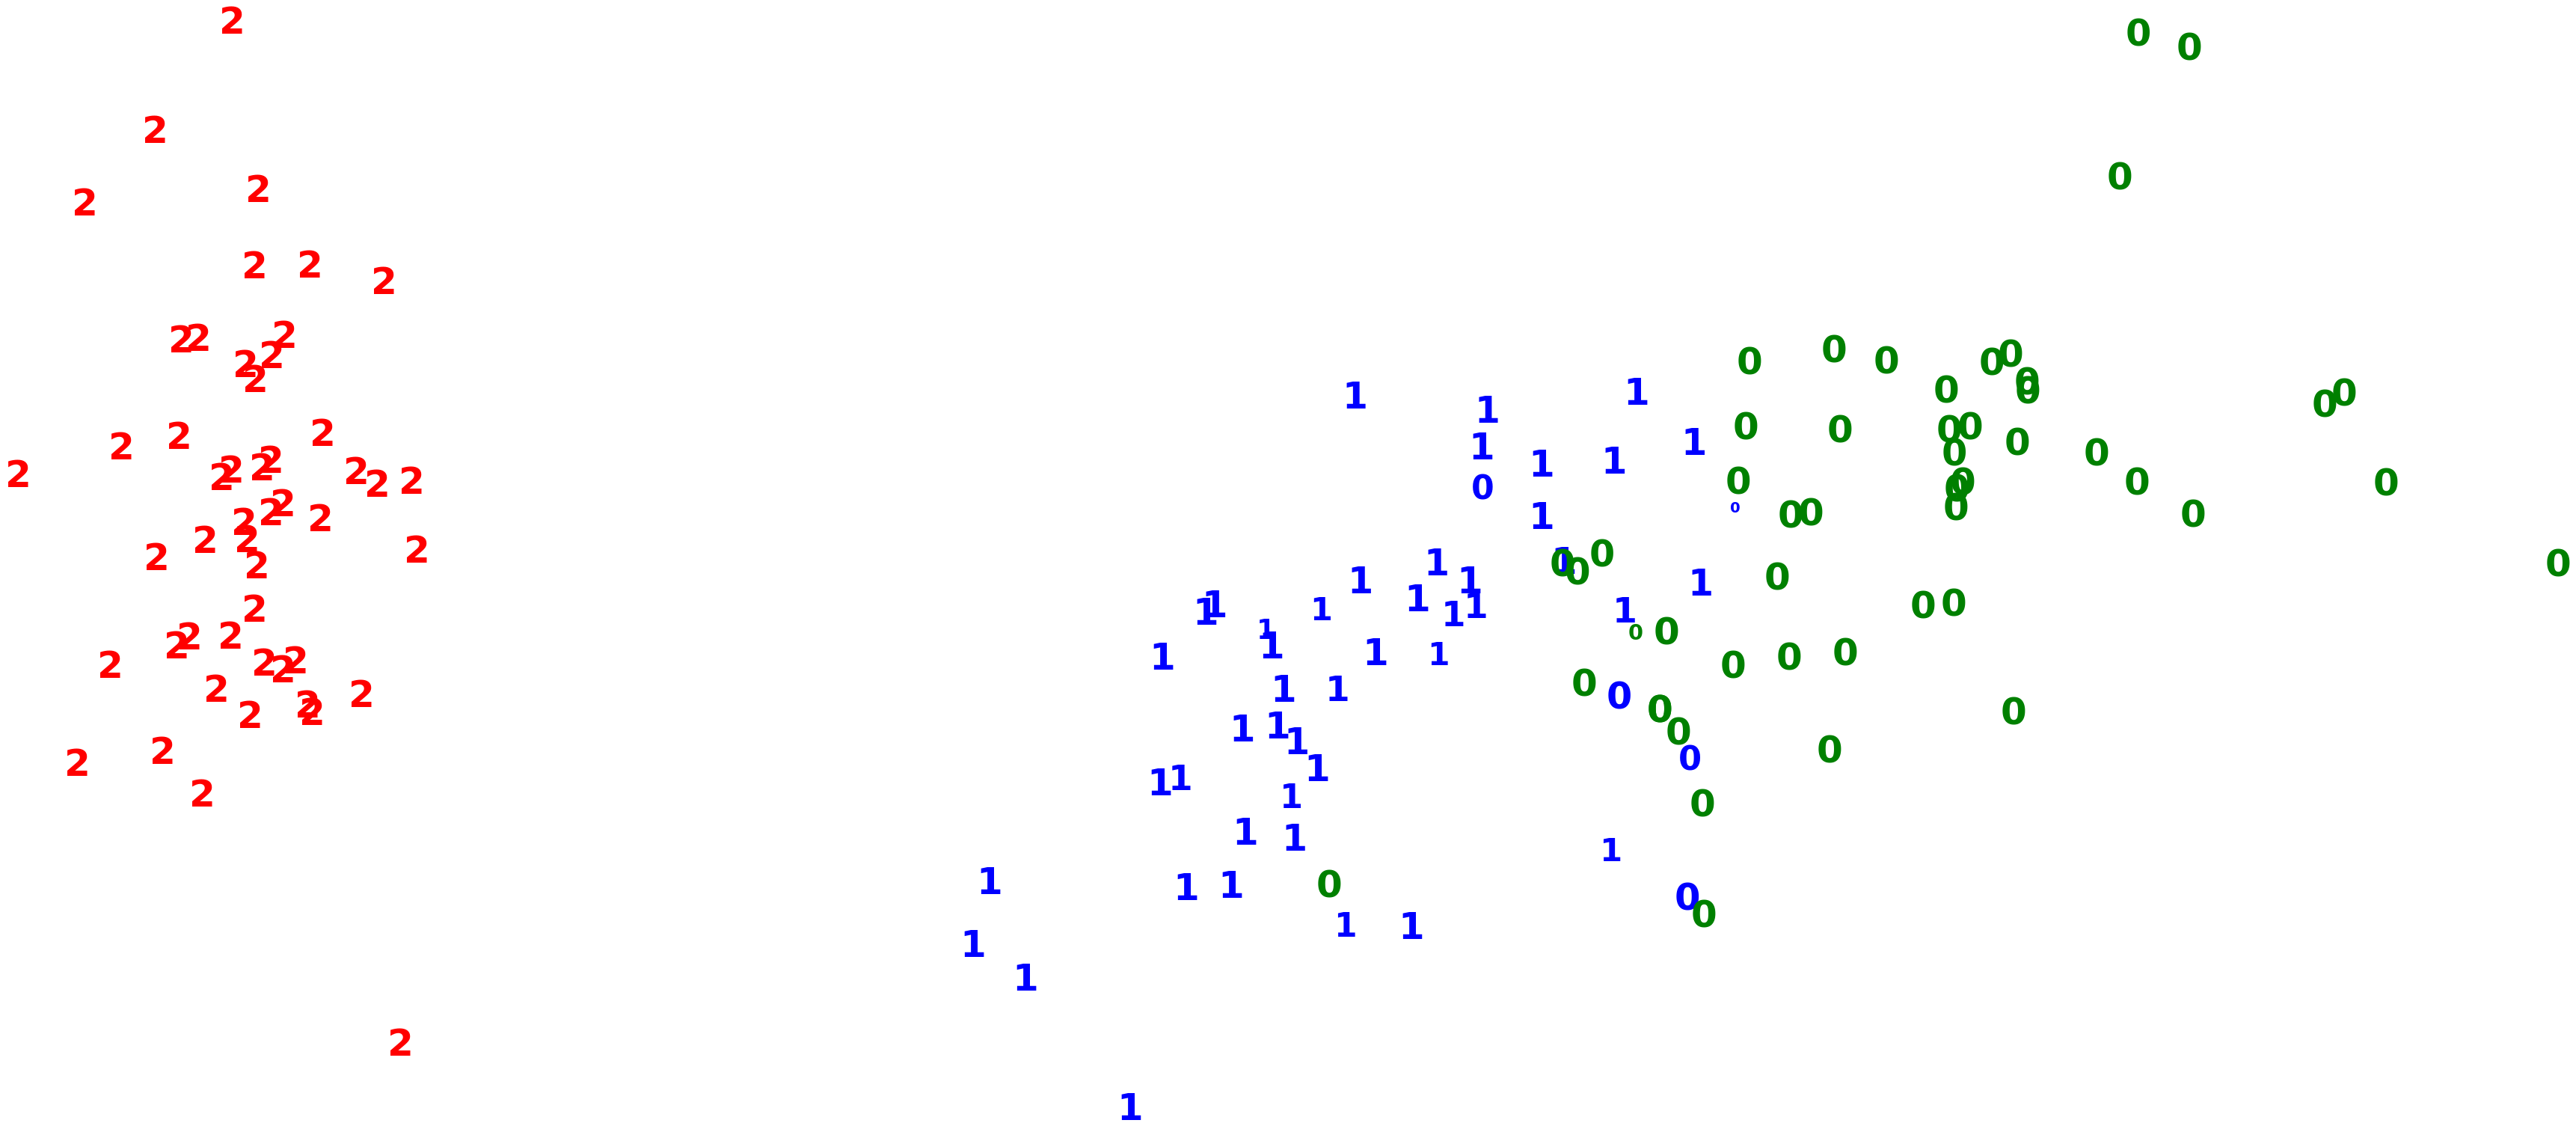

In [7]:
#how the soft-clustering aspect of the GMM works by resizing the points according to the highest probability assigned to them by the winning cluster:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # Squaring emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#the probabilities assigned to the observations of the different classes that are very close to each other are relatively low. And the more isolated observations are assigned relatively high probabilities.